# S01.E03 - **Titanic Sinking: Chronology of a Maritime Tragedy**
by **@caesarmario** /// <a href="https://linktr.ee/caesarmario_">https://linktr.ee/caesarmario_</a>

## 1. | Importing Libraries

In [1]:
# --- Libraries for 'Secret Sauce' ---
import sys
from IPython.display import display, HTML, Javascript

# --- 'Secret Sauce' Variables ---
""" Change Variables ~! HERE !~ """
project_date = "20240124"
local_path = "config_data_slices"

# ---'Secret Sauce' Function ---
def apply_config_file_data_slices(local_path, project_date):
    sys.path.append(f"{local_path}/{project_date}/")
    
# --- Apply Function & Import Config File ---
apply_config_file_data_slices(local_path, project_date)
from config_file import *

In [2]:
# --- Importing Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import seaborn as sns
import urllib

from PIL import Image
from highlight_text import fig_text, ax_text
from datetime import datetime
from dateutil.relativedelta import relativedelta

## 2. | Titanic Timeline

In [3]:
# --- Timeline Dictionary ---
titanic_timeline_dict = {
    0 : {
        "date": "1912-04-10"
        , "hour": None
        , "event": None
        , "x_pos": 1
    }
    , 1 : {
        "date": "1912-04-10"
        , "hour": "13:30"
        , "event": "The Titanic sets sail from\nSouthampton to NYC."
        , "x_pos": 1.5
    }
    , 2 : {
        "date": "1912-04-14"
        , "hour": None
        , "event": None
        , "x_pos": 2
    }
    , 3 : {
        "date": "1912-04-14"
        , "hour": "23:40"
        , "event": "Titanic receives warning from\nSS Californian about pack ice\nin the area."
        , "x_pos": 2.75
    }
    , 4 : {
        "date": "1912-04-14"
        , "hour": "23:45"
        , "event": "Lookout spots an iceberg ahead\nand alerts the bridge."
        , "x_pos": 3.5
    }
    , 5 : {
        "date": "1912-04-14"
        , "hour": "23:50"
        , "event": "Titanic collides with the iceberg,\ncausing damage to the hull."
        , "x_pos": 4.25
    }
    , 6 : {
        "date": "1912-04-15"
        , "hour": None
        , "event": None
        , "x_pos": 5
    }
    , 7 : {
        "date": "1912-04-15"
        , "hour": "00:05"
        , "event": "Crew assesses the damage\ncaused by the collision."
        , "x_pos": 5.6
    }
    , 8 : {
        "date": "1912-04-15"
        , "hour": "00:25"
        , "event": "Captain Smith orders lifeboats\nto be prepared and passengers\nto be awakened."
        , "x_pos": 6.2
    }
    , 9 : {
        "date": "1912-04-15"
        , "hour": "00:45"
        , "event": "Order given to start\nloading passengers into lifeboats."
        , "x_pos": 6.8
    }
    , 10 : {
        "date": "1912-04-15"
        , "hour": "02:05"
        , "event": "First lifeboat (Lifeboat No. 7)\nis launched with only\n28 people on board."
        , "x_pos": 7.4
    }
    , 11 : {
        "date": "1912-04-15"
        , "hour": "02:17"
        , "event": "Titanic's angle in the water\nbecomes steeper as the bow\nsinks lower."
        , "x_pos": 8
    }
    , 12 : {
        "date": "1912-04-15"
        , "hour": "02:18"
        , "event": "Distress signal CQD\n(later changed to SOS)\nis sent out."
        , "x_pos": 8.6
    }
    , 13 : {
        "date": "1912-04-15"
        , "hour": "02:20"
        , "event": "Lifeboat No. 7 is launched\nwith only 28 people\non board."
        , "x_pos": 9.2
    }
    , 14 : {
        "date": "1912-04-15"
        , "hour": "02:20"
        , "event": "Titanic's forward\nfunnel collapses."
        , "x_pos": 9.8
    }
    , 15 : {
        "date": "1912-04-15"
        , "hour": "02:27"
        , "event": "Lifeboat No. 5 is\nlaunched with only\n41 people on board."
        , "x_pos": 10.4
    }
    , 16 : {
        "date": "1912-04-15"
        , "hour": "02:30"
        , "event": "Stern of the Titanic begins\nto rise out of the water."
        , "x_pos": 11
    }
    , 17 : {
        "date": "1912-04-15"
        , "hour": "02:39"
        , "event": "Lights on the Titanic\ngo out as the ship\nbreaks in two."
        , "x_pos": 11.6
    }
    , 18 : {
        "date": "1912-04-15"
        , "hour": "02:40"
        , "event": "Stern of the Titanic sinks,\nwhile the bow remains\nafloat for a short time."
        , "x_pos": 12.2
    }
    , 19 : {
        "date": "1912-04-15"
        , "hour": "04:10"
        , "event": "RMS Carpathia arrives at the scene\nand begins rescuing survivors."
        , "x_pos": 12.8
    }
    , 20 : {
        "date": "1912-04-15"
        , "hour": "08:30"
        , "event": "The Californian arrives and\nsearches the area for several hours\nbut fails to find any survivors."
        , "x_pos": 13.4
    }
    , 21 : {
        "date": "1912-04-15"
        , "hour": "08:50"
        , "event": "The RMS Carpathia,\ncarrying the 705 Titanic survivors,\nheads to New York City."
        , "x_pos": 14
    }
}

# --- Create Dataframe ---
df = pd.DataFrame(titanic_timeline_dict).transpose()
df

,date,hour,event,x_pos
0,1912-04-10,None,None,1
1,1912-04-10,13:30,The Titanic sets sail from\nSouthampton to NYC.,1.5
2,1912-04-14,None,None,2
3,1912-04-14,23:40,Titanic receives warning from\nSS Californian ...,2.75
4,1912-04-14,23:45,Lookout spots an iceberg ahead\nand alerts the...,3.5
5,1912-04-14,23:50,"Titanic collides with the iceberg,\ncausing da...",4.25
6,1912-04-15,None,None,5
7,1912-04-15,00:05,Crew assesses the damage\ncaused by the collis...,5.6
8,1912-04-15,00:25,Captain Smith orders lifeboats\nto be prepared...,6.2
9,1912-04-15,00:45,Order given to start\nloading passengers into ...,6.8


In [4]:
# --- Main Timestamp ---
df_dates = df[["date", "x_pos"]][df["hour"].isna() & df["event"].isna()].reset_index(drop=True)
df_dates

,date,x_pos
0,1912-04-10,1
1,1912-04-14,2
2,1912-04-15,5


In [5]:
# --- Event Timestamp ---
df_timeline = df[df["hour"].notna() & df["event"].notna()].reset_index(drop=True)
df_timeline

,date,hour,event,x_pos
0,1912-04-10,13:30,The Titanic sets sail from\nSouthampton to NYC.,1.5
1,1912-04-14,23:40,Titanic receives warning from\nSS Californian ...,2.75
2,1912-04-14,23:45,Lookout spots an iceberg ahead\nand alerts the...,3.5
3,1912-04-14,23:50,"Titanic collides with the iceberg,\ncausing da...",4.25
4,1912-04-15,00:05,Crew assesses the damage\ncaused by the collis...,5.6
5,1912-04-15,00:25,Captain Smith orders lifeboats\nto be prepared...,6.2
6,1912-04-15,00:45,Order given to start\nloading passengers into ...,6.8
7,1912-04-15,02:05,First lifeboat (Lifeboat No. 7)\nis launched w...,7.4
8,1912-04-15,02:17,Titanic's angle in the water\nbecomes steeper ...,8
9,1912-04-15,02:18,Distress signal CQD\n(later changed to SOS)\ni...,8.6


In [6]:
# --- Figure Variables ---
# Sizes
logo_size = 0.05
wm_size = 0.05

# Limit
xmin_lim, xmax_lim = 0, 15
ymin_lim, ymax_lim = -3, 3

# Stem Levels
lvl_coor = [-2.4, 2.4, -1.7, 1.7, -1.2, 1.2]
levels = np.tile(lvl_coor, int(np.ceil(len(df_timeline)/len(lvl_coor))))[:len(df_timeline)]

# Titanic Background
titanic_url = "https://i.ibb.co/xmD6BT4/titanic-background-data-slices.png" 
titanic_drawing = Image.open(urllib.request.urlopen(titanic_url))

# Figure & Highlight Props
fig_text_prop = dict(ha="left", va="bottom")
subtitle_highlight_prop1 = [
    {"color": colors_timeline[0], "weight": "bold", "font": font_alt}
    , {"color": colors_timeline[0], "weight": "bold", "font": font_alt}
    , {"color": colors_timeline[4], "weight": "bold", "font": font_alt}
]
subtitle_highlight_prop2 = [
    {"color": colors_timeline[4], "weight": 600, "font": font_alt}
    , {"weight": 600, "font": font_alt}
]
sources_highlight_prop = [{"font": font_main, "weight": "bold", "style": "normal", "fontsize": 6}]

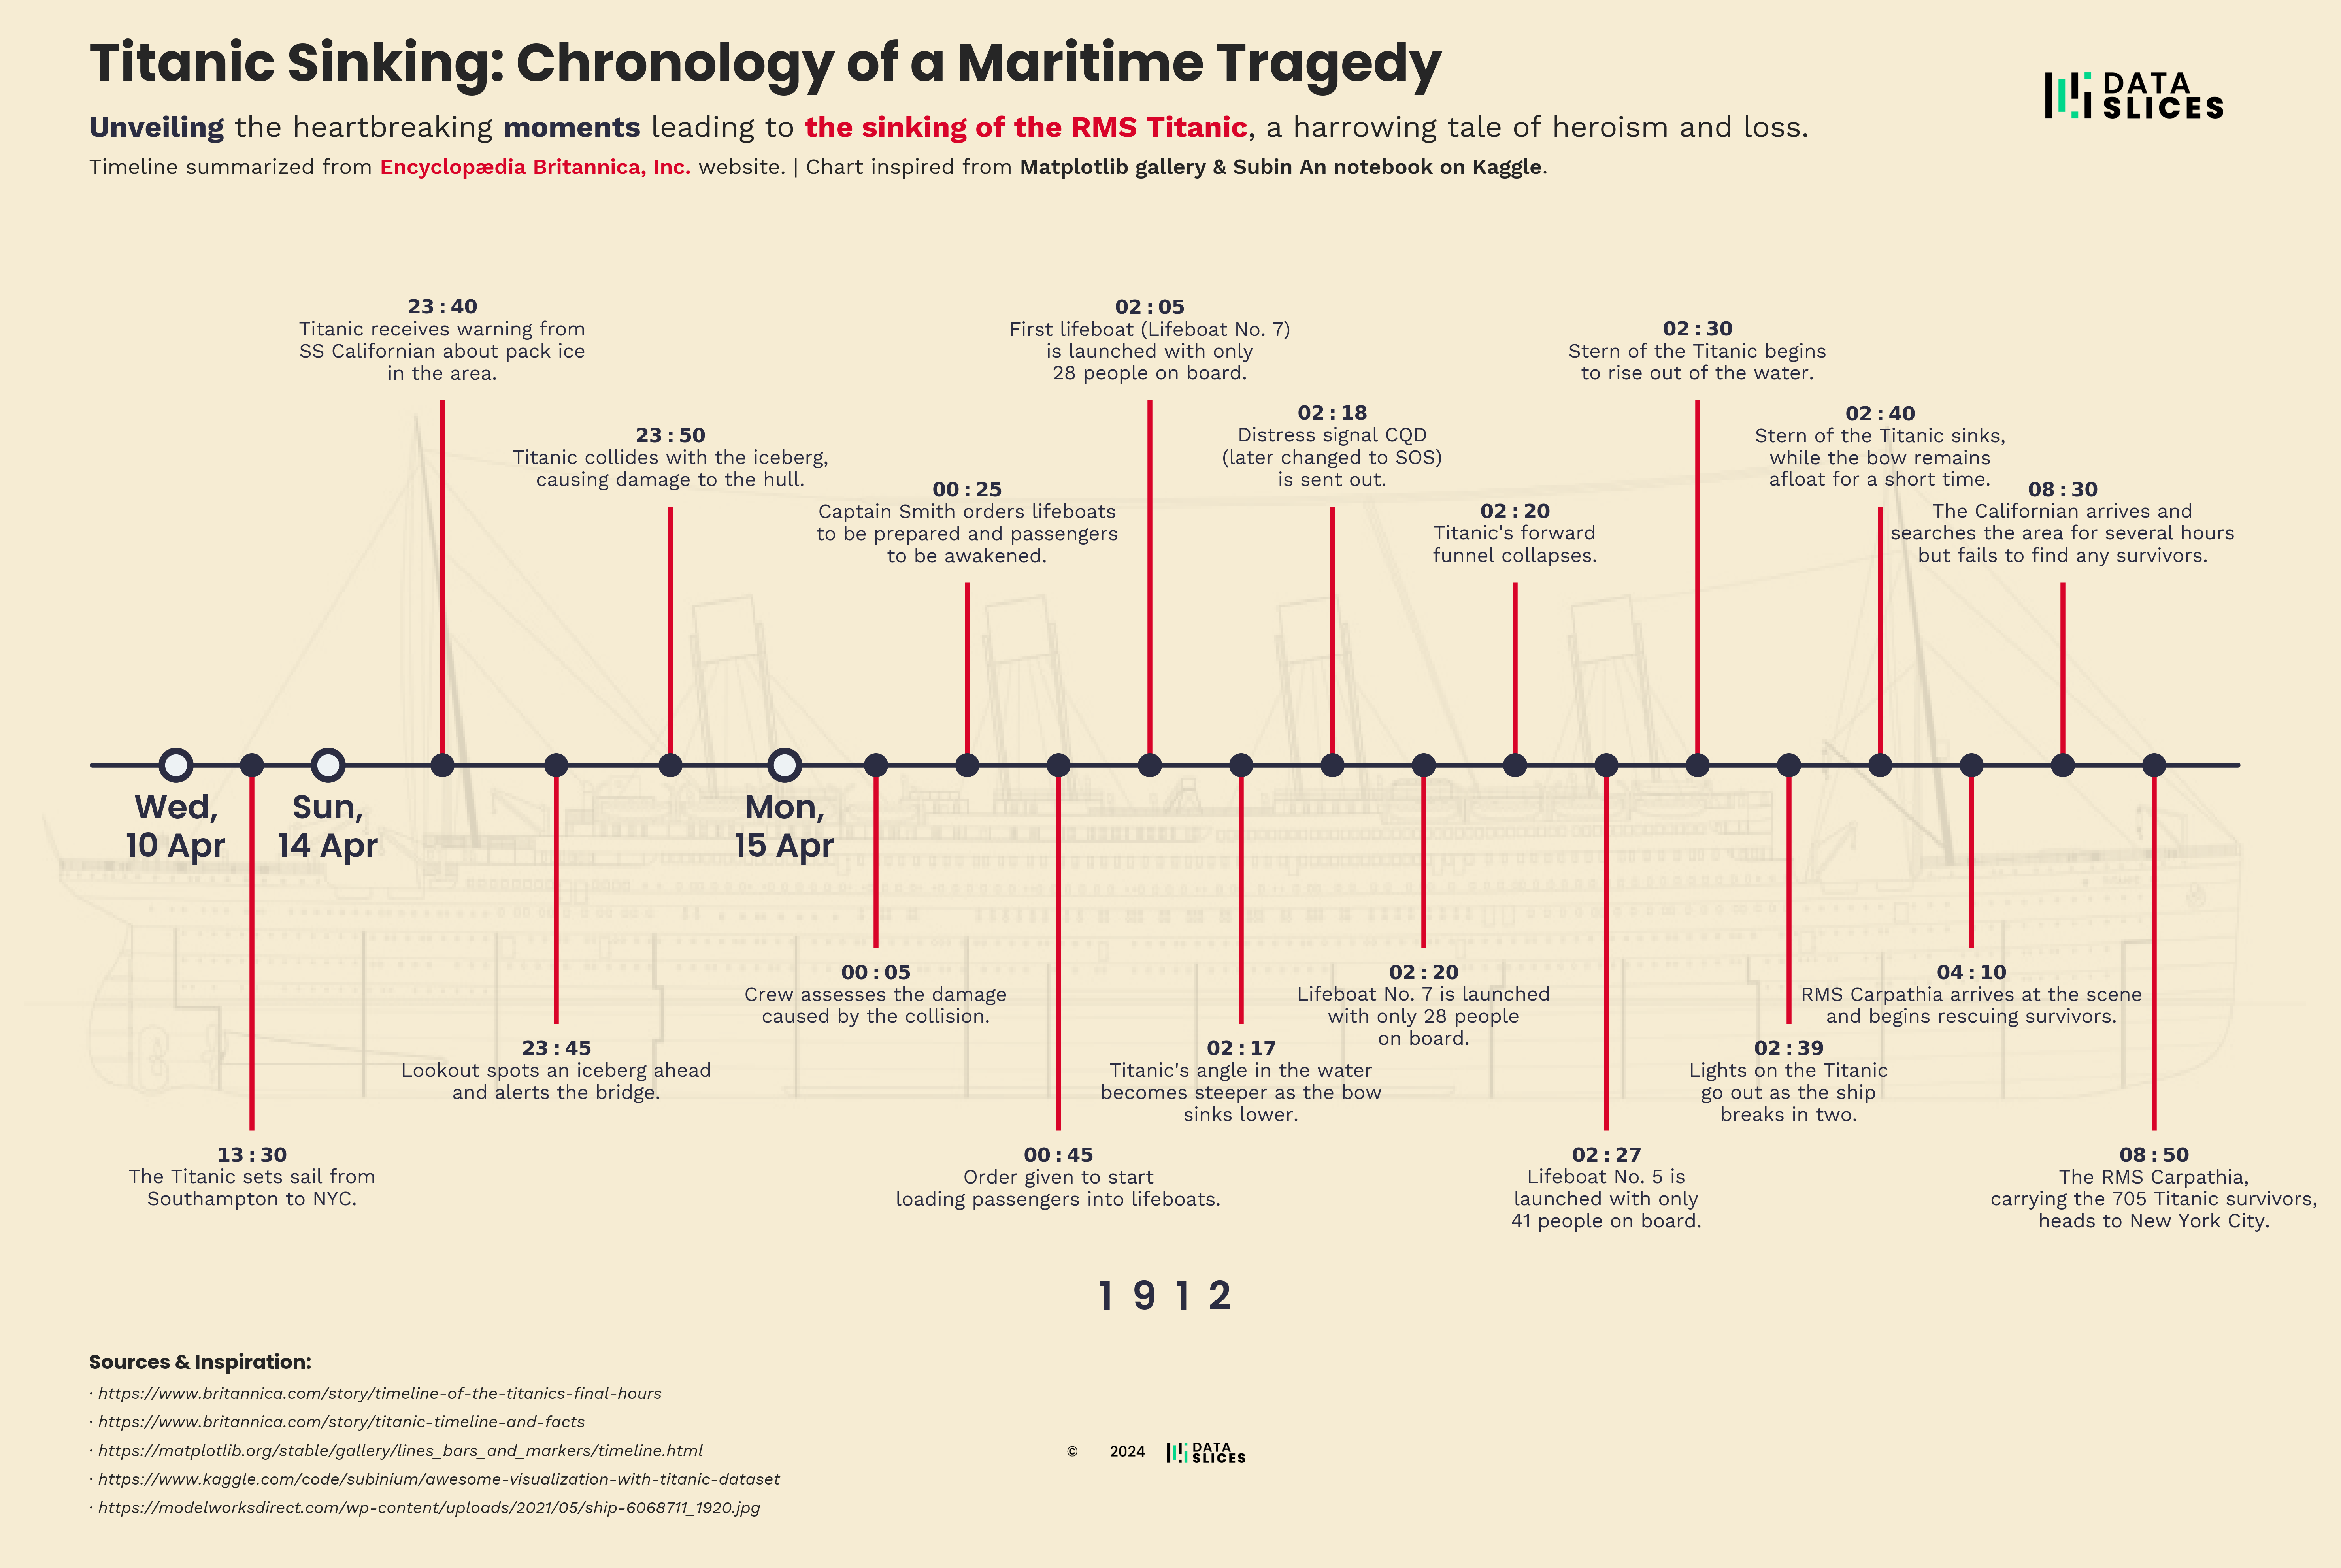

In [7]:
# --- Figure Size ---
fig, ax = plt.subplots(figsize=(15, 5))

# --- Axes Limit ---
ax.set_xlim(xmin_lim, xmax_lim)
ax.set_ylim(ymin_lim, ymax_lim)

# --- Plots ---
h_line = ax.axhline(0, xmin=0.03, xmax=0.97, c=colors_timeline[0], zorder=1)
main_date = ax.scatter(df_dates["x_pos"], np.zeros(len(df_dates)), color=colors_timeline[2], edgecolor=colors_timeline[0], marker="o", s=75, linewidth=2, zorder=3)
event_date = ax.scatter(df_timeline["x_pos"], np.zeros(len(df_timeline)), color=colors_timeline[0], s=40, zorder=3)

# --- Scatter Plot ---
# Main Date 
for date, x_pos in zip(df_dates["date"], df_dates["x_pos"]):
    date = datetime.strptime(date, "%Y-%m-%d").strftime("%a,\n%d %b")
    ax.text(x_pos, -0.6, date, ha="center", fontsize=10, color=colors_timeline[0], fontweight=600, zorder=2)
    
# Event
for hour, event, x_pos, level in zip(df_timeline["hour"], df_timeline["event"], df_timeline["x_pos"], levels):
    annotate_text = f"$\\bf{hour}$\n{event}"
    ax.annotate(annotate_text, xy=(x_pos, level), xytext=(0, np.sign(level)*5), color=colors_timeline[0], textcoords="offset points", ha="center", va="bottom" if level > 0 else "top", fontsize=6, fontname=font_alt, zorder=2)
    ax.vlines(x_pos, 0, level, color=colors_timeline[4], zorder=1)

# --- Background Image ---
ax.imshow(titanic_drawing, alpha=0.7, extent=(xmin_lim, xmax_lim, ymin_lim+0.5, ymax_lim-0.5))

# --- X Label ---
ax.set_xlabel("\n1  9  1  2", fontsize=12, weight=600, color=colors_timeline[0])

# --- Image Logo ---
# Logo
logo_ax = fig.add_axes([0.76, 1.035, logo_size, logo_size], fc="None")
logo_ax.imshow(data_slices_logo)
logo_ax.axis("off")
    
# Watermark
wm_ax = fig.add_axes([0.485, -0.11, wm_size, wm_size], fc="None")
wm_ax.imshow(data_slices_wm)
wm_ax.axis("off")

# --- Figure Texts ---
# Title
fig_text(s="Titanic Sinking: Chronology of a Maritime Tragedy", x=0.21, y=1.06, fontsize=16, weight="bold", **fig_text_prop)
    
# Subtitle
fig_text(s=f"<Unveiling> the heartbreaking <moments> leading to <the sinking of the RMS Titanic>, a harrowing tale of heroism and loss.", x=0.21, y=1.02, fontsize=9, font=font_alt, highlight_textprops=subtitle_highlight_prop1, **fig_text_prop)
fig_text(s=f"Timeline summarized from <Encyclopædia Britannica, Inc.> website. | Chart inspired from <Matplotlib gallery & Subin An notebook on Kaggle>.", x=0.21, y=0.99, fontsize=6.5, font=font_alt, highlight_textprops=subtitle_highlight_prop2, **fig_text_prop)
    
# References
fig_text(s="""
<Sources & Inspiration:>
∙ https://www.britannica.com/story/timeline-of-the-titanics-final-hours
∙ https://www.britannica.com/story/titanic-timeline-and-facts
∙ https://matplotlib.org/stable/gallery/lines_bars_and_markers/timeline.html
∙ https://www.kaggle.com/code/subinium/awesome-visualization-with-titanic-dataset
∙ https://modelworksdirect.com/wp-content/uploads/2021/05/ship-6068711_1920.jpg
""", x=0.21, y=-0.15, fontsize=5, font=font_alt, style="italic", highlight_textprops=sources_highlight_prop, **fig_text_prop)

# --- Finalizing Figure ---
ax.tick_params(axis="both", which="major", left="off", bottom="off", labelbottom=False, labelleft=False, length=0)
for spine in ax.spines.values(): spine.set_color("None")
ax.grid(alpha=0)
plt.savefig(f"data_slices_s01e03_titanic_timeline.png", dpi=figure_dpi_hd, bbox_inches="tight", edgecolor="none", transparent=False);

<hr>
<center>
    <span style="font-family: Segoe UI; font-style: italic; font-weight: 700; font-size: 11px; padding: 7px; text-align: center; line-height: 1.2;"><u>Support me on:</u></span><br>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my work, please support me by giving stars (⭐) to this repo. You can also support me by donating to my Ko-Fi page ☕: https://ko-fi.com/caesarmario. Your donation and support will be highly appreciated since they motivate me to create new content. Thank you so much, and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->
    <span style="margin: 0; text-align: center; justify-content: center; align-items: center;">
        <a href='https://ko-fi.com/D1D3JU963' target='_blank'><img src='https://ko-fi.com/img/githubbutton_sm.svg' alt='Support me on Ko-fi Button'/></a></span><br>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my work, please support me by giving stars (⭐) to this repo. You can also support me by donating to my Ko-Fi page ☕: https://ko-fi.com/caesarmario. Your donation and support will be highly appreciated since they motivate me to create new content. Thank you so much, and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->
    <span style="font-family: Segoe UI; font-style: italic; font-weight: 700; font-size: 11px; padding: 7px; text-align: center; line-height: 1.2;"><u>Follow me in other platform:</u></span><br>
    <div align="center" style="margin: 0; padding: 10px; text-align: center; justify-content: center; align-items: center;">
        <ul style="list-style: none;">
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my work, please support me by giving stars (⭐) to this repo. You can also support me by donating to my Ko-Fi page ☕: https://ko-fi.com/caesarmario. Your donation and support will be highly appreciated since they motivate me to create new content. Thank you so much, and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->
            <li style="margin: 0 20px 20px 0; vertical-align: top; list-style: none outside none; display: inline-block;"><a style="position: relative;" href="https://www.kaggle.com/caesarmario"><img style="width: 25px;" src="https://i.ibb.co/fnBbFZZ/kaggle-black.png"></a></li>
            <li style="margin: 0 20px 20px 0; vertical-align: top; list-style: none outside none; display: inline-block;"><a style="position: relative;" href="https://public.tableau.com/app/profile/caesarmario"><img style="width: 25px;" src="https://i.ibb.co/MkGtVv0/tableau-public-black.png"></a></li>
            <li style="margin: 0 20px 20px 0; vertical-align: top; list-style: none outside none; display: inline-block;"><a style="position: relative;" href="https://github.com/caesarmario"><img style="width: 25px;" src="https://i.ibb.co/d4ngSJk/github-black.png"></a></li>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my work, please support me by giving stars (⭐) to this repo. You can also support me by donating to my Ko-Fi page ☕: https://ko-fi.com/caesarmario. Your donation and support will be highly appreciated since they motivate me to create new content. Thank you so much, and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->
            <li style="margin: 0 20px 20px 0; vertical-align: top; list-style: none outside none; display: inline-block;"><a style="position: relative;" href="https://caesarmario.medium.com/"><img style="width: 25px;" src="https://i.ibb.co/8P7JfHx/medium-black.png"></a></li>
            <li style="margin: 0 20px 20px 0; vertical-align: top; list-style: none outside none; display: inline-block;"><a style="position: relative;" href="https://www.linkedin.com/in/caesarmario"><img style="width: 25px;" src="https://i.ibb.co/BwV3SH6/linkedin-black.png"></a></li>
            <li style="margin: 0 20px 20px 0; vertical-align: top; list-style: none outside none; display: inline-block;"><a style="position: relative;" href="https://twitter.com/caesarmario_"><img style="width: 25px;" src="https://i.ibb.co/Tb6Vwxh/twitter-black.png"></a></li>
        </ul>
    </div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my work, please support me by giving stars (⭐) to this repo. You can also support me by donating to my Ko-Fi page ☕: https://ko-fi.com/caesarmario. Your donation and support will be highly appreciated since they motivate me to create new content. Thank you so much, and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->
    <img src="https://i.ibb.co/jZh1X6d/WM-2024-caesarmario.png" width=65% alt="WM">
</center>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my work, please support me by giving stars (⭐) to this repo. You can also support me by donating to my Ko-Fi page ☕: https://ko-fi.com/caesarmario. Your donation and support will be highly appreciated since they motivate me to create new content. Thank you so much, and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->